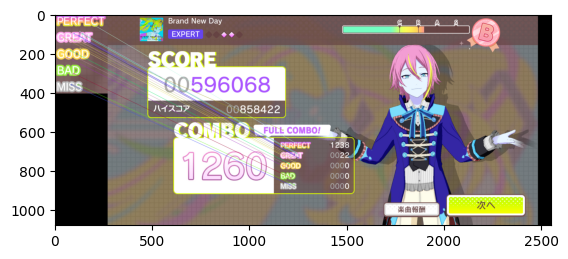

In [9]:
# -*- coding: utf-8 -*-
import cv2
import matplotlib.pyplot as plt

# 画像１
img1 = cv2.imread("img2.png")
# 画像２
img2 = cv2.imread("target.png")

# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()                                

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) , None)
kp2, des2 = akaze.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) , None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher()

# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.knnMatch(des1, des2, k=2)

# データを間引きする
ratio = 0.75
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.imshow(img3)
